In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from helper import *

In [2]:
df_arma_fogo = pd.read_csv('./data/gold/suicidio_armas.csv')
df_perfuro_cortante = pd.read_csv('./data/gold/suicidio_perfuro.csv')
df_sufocamento = pd.read_csv('./data/gold/suicidio_sufoc.csv')

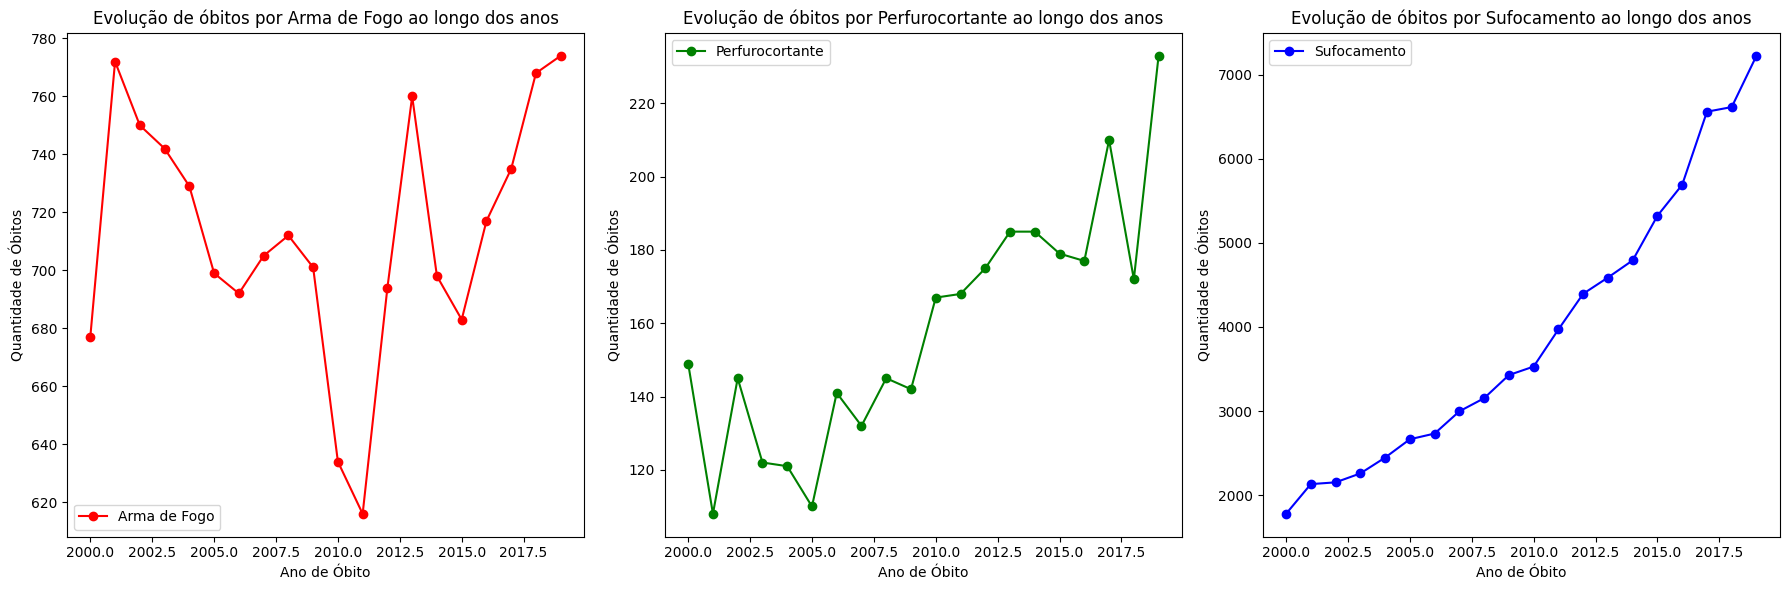

In [3]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_evolution(axes[0], df_arma_fogo, 'Arma de Fogo', 'red')
plot_evolution(axes[1], df_perfuro_cortante, 'Perfurocortante', 'green')
plot_evolution(axes[2], df_sufocamento, 'Sufocamento', 'blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

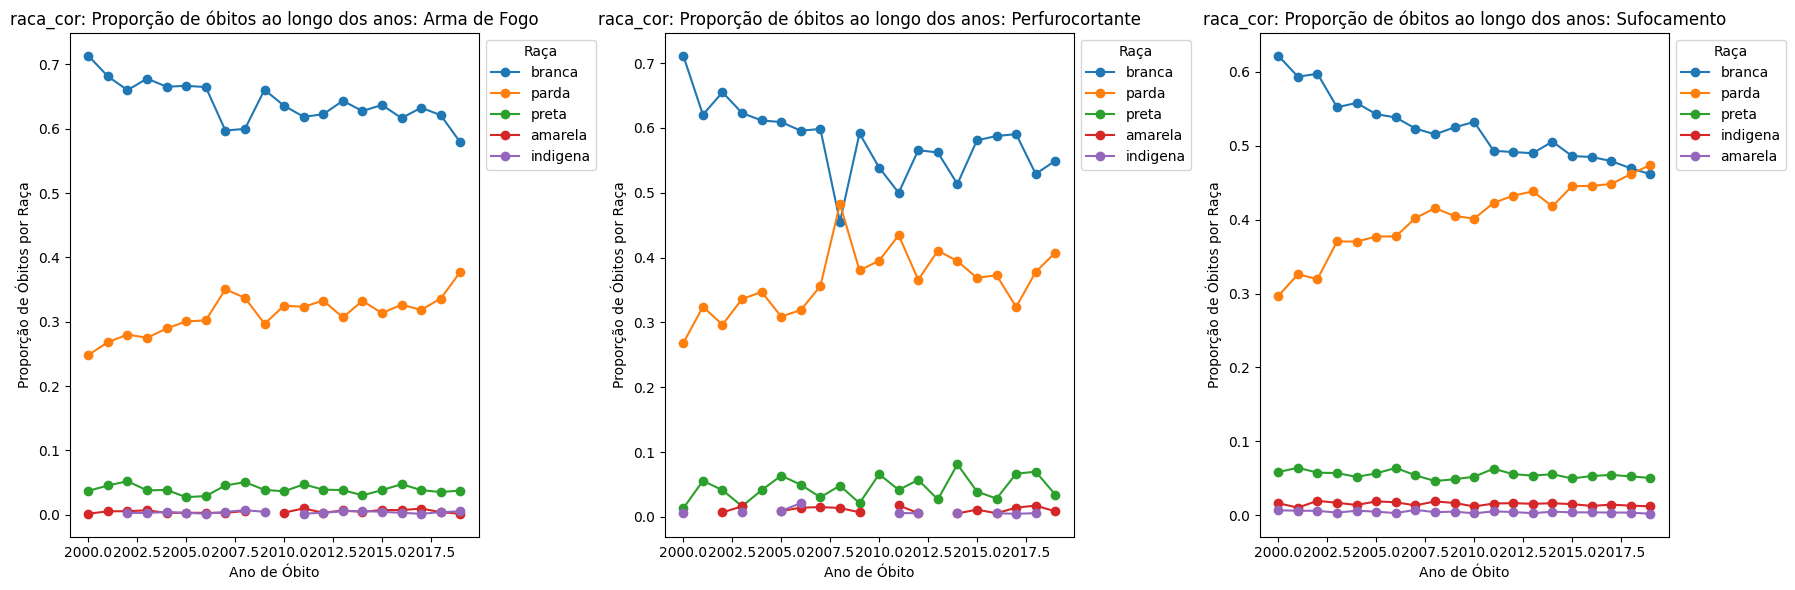

In [4]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_race_proportion(ax=axes[0], df=df_arma_fogo, coluna='raca_cor', categoria='Arma de Fogo', cor='red')
plot_race_proportion(ax=axes[1], df=df_perfuro_cortante, coluna='raca_cor', categoria='Perfurocortante', cor='green')
plot_race_proportion(ax=axes[2], df=df_sufocamento, coluna='raca_cor', categoria='Sufocamento', cor='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

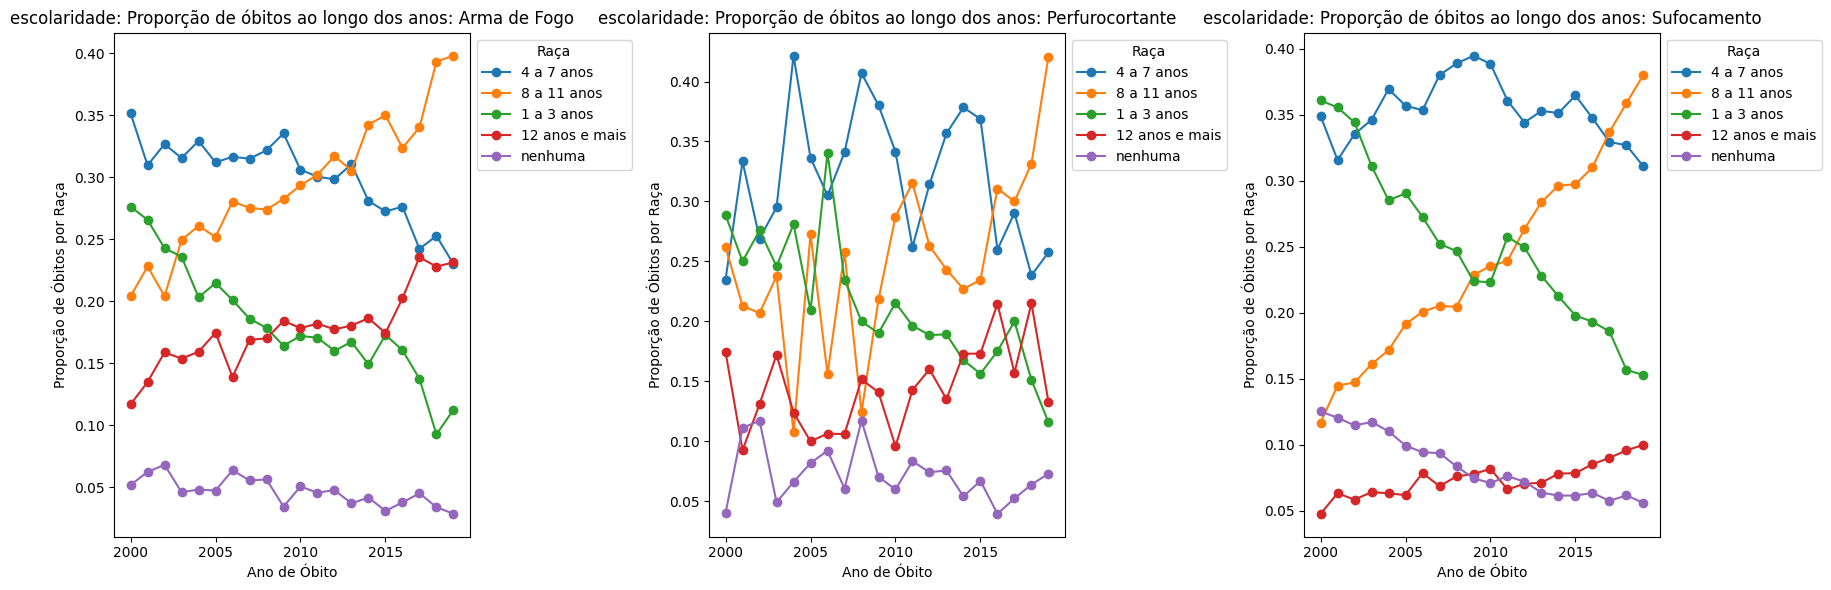

In [5]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_race_proportion(ax=axes[0], df=df_arma_fogo, coluna='escolaridade', categoria='Arma de Fogo', cor='red')
plot_race_proportion(ax=axes[1], df=df_perfuro_cortante,coluna='escolaridade', categoria='Perfurocortante', cor='green')
plot_race_proportion(ax=axes[2], df=df_sufocamento, coluna='escolaridade', categoria='Sufocamento', cor='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

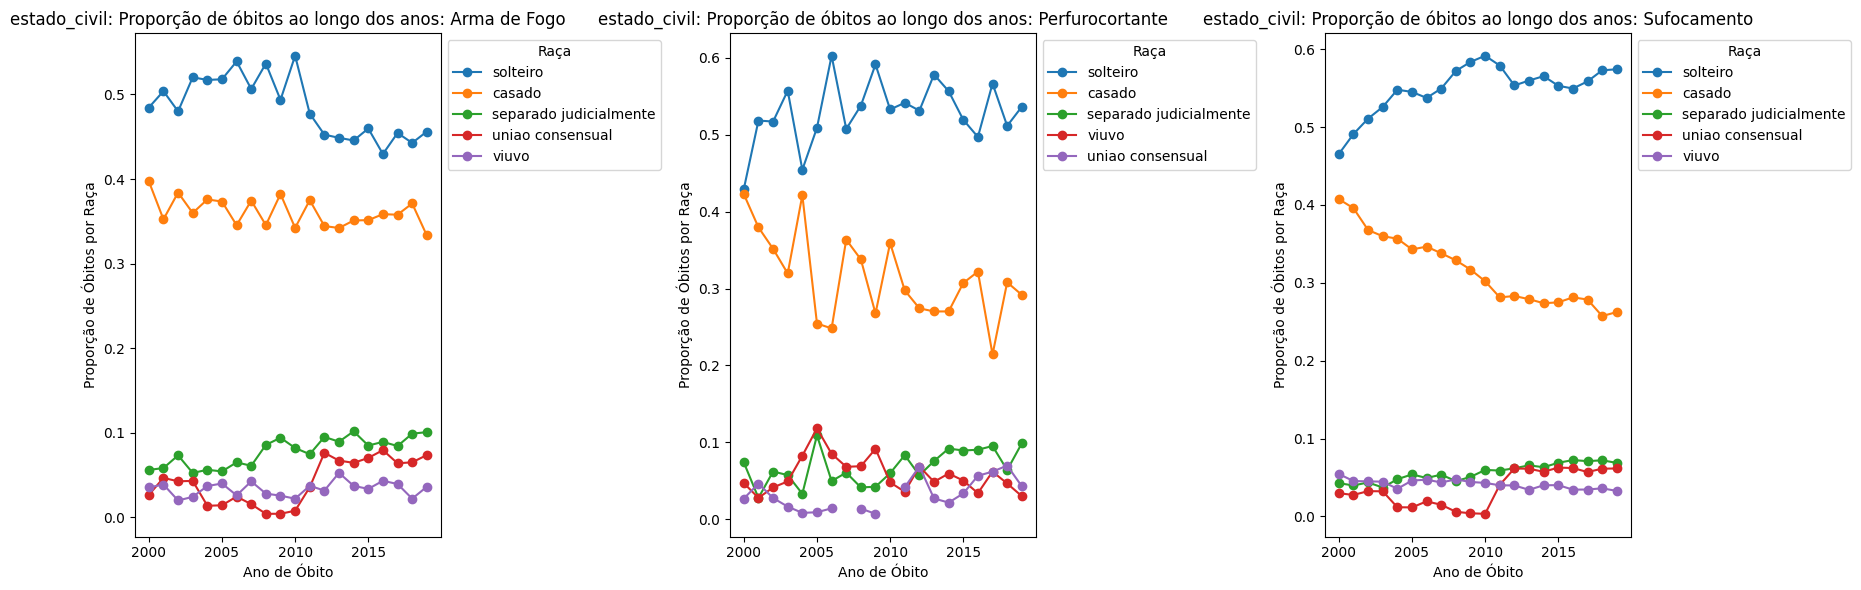

In [6]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_race_proportion(ax=axes[0], df=df_arma_fogo, coluna='estado_civil', categoria='Arma de Fogo', cor='red')
plot_race_proportion(ax=axes[1], df=df_perfuro_cortante, coluna='estado_civil', categoria='Perfurocortante', cor='green')
plot_race_proportion(ax=axes[2], df=df_sufocamento, coluna='estado_civil', categoria='Sufocamento', cor='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos

plt.show()

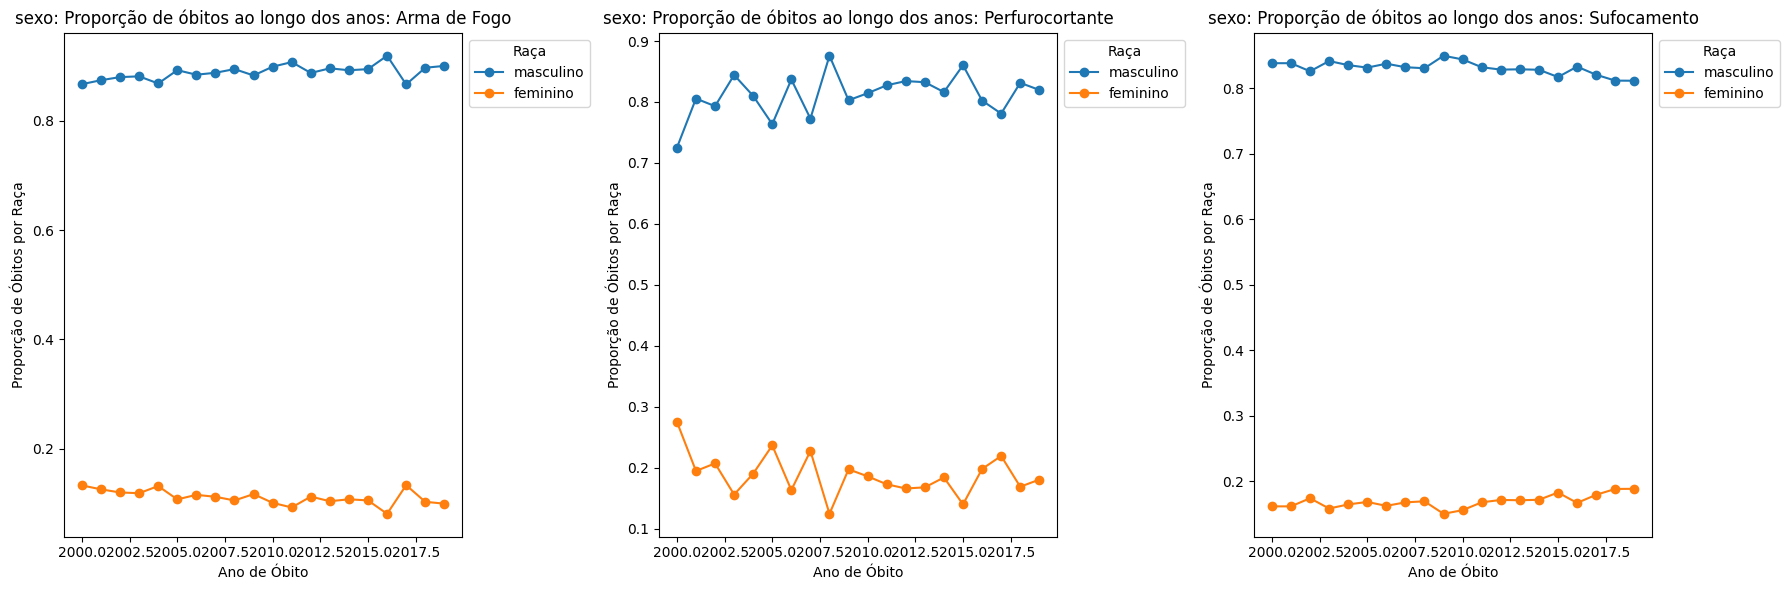

In [7]:
# Criando| subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_race_proportion(ax=axes[0], df=df_arma_fogo, coluna='sexo', categoria='Arma de Fogo', cor='red')
plot_race_proportion(ax=axes[1], df=df_perfuro_cortante, coluna='sexo', categoria='Perfurocortante', cor='green')
plot_race_proportion(ax=axes[2], df=df_sufocamento, coluna='sexo', categoria='Sufocamento', cor='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

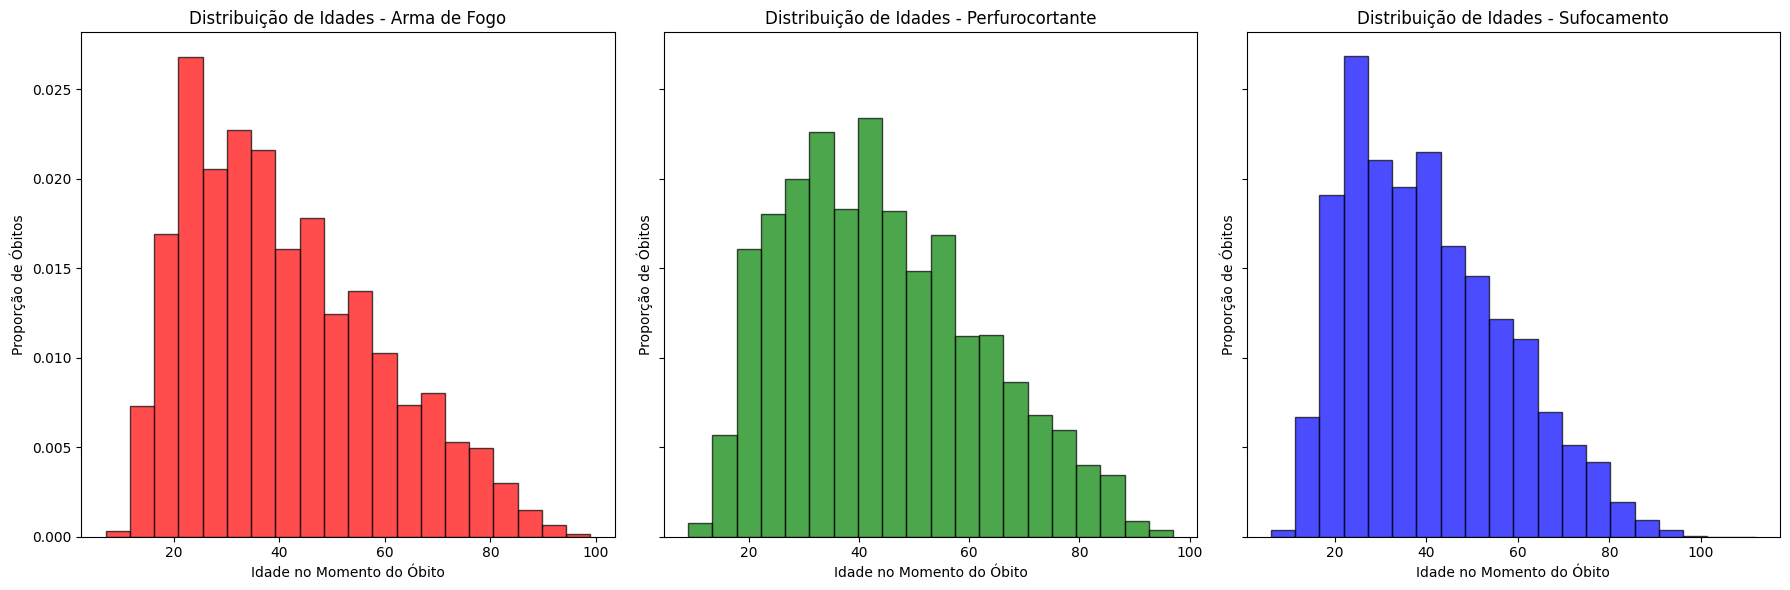

In [8]:
# Criando subplots com mesma escala no eixo y
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_age_distribution(axes[0], df_arma_fogo, 'Arma de Fogo', 'red')
plot_age_distribution(axes[1], df_perfuro_cortante, 'Perfurocortante', 'green')
plot_age_distribution(axes[2], df_sufocamento, 'Sufocamento', 'blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()